In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
def load_data():
    bank_df = pd.read_csv('bank/bank.csv', index_col=0,delimiter=';')
    bank_full_df = pd.read_csv('bank/bank-full.csv',delimiter=';')
    return bank_df,bank_full_df

In [3]:
bank_df,bank_full_df=load_data()
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


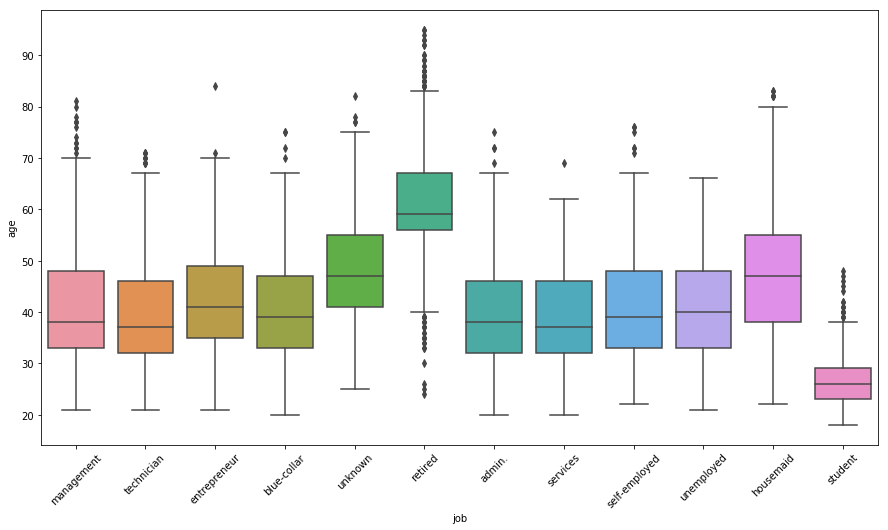

In [4]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('job', 'age', data=bank_full_df)

In [5]:
bank_f=bank_full_df.copy()
bank_f.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_f.drop(['duration','contact','month','day'], axis=1,inplace=True) # was removed


In [7]:
bank_f.head()

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,unknown,no


In [ ]:
bank_f.loc[bank_f['age'] >=70, 'job'] = 'retired'
bank_f.drop(bank_f[(bank_f.job=='student') & (bank_f.age>=40)].index,inplace=True)
bank_f.drop(bank_f[(bank_f.job=='retired') & (bank_f.age<=40)].index,inplace=True)

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('job', 'age', data=bank_f)

In [ ]:
bank_f['job'].value_counts()

In [ ]:
# bank_full_df
crosstab = pd.crosstab(index=bank_f["job"], columns=bank_f["y"]).apply(lambda r: r/r.sum(), axis=1)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [ ]:
def lblencoding(df,columns):
    for column in columns:
        lablel_encoder = LabelEncoder()
        df[column] = lablel_encoder.fit_transform(df[column])
    return df
        

columns=['job','marital','education','poutcome','default','housing','loan','y'] 
lblencoding(bank_f,columns)

In [ ]:
bank_f['pdays'].replace(-1,999,inplace=True)


In [ ]:
def age_buck(row):
   if row['age']>60:
       val = 0
   elif(row['age']>= 20 and row['age']<60):
       val = 1
   else:
       val = 2

   return val

In [ ]:
bank_f['age_buck'] = bank_f.apply(age_buck,axis=1)



In [ ]:
# bank_full_df
crosstab = pd.crosstab(index=bank_f["age_buck"], columns=bank_f["y"]).apply(lambda r: r/r.sum(), axis=1)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [ ]:
bank_f = pd.get_dummies(bank_f, columns=['age'])


In [ ]:
bank_f = pd.get_dummies(bank_f, columns=['job'])
bank_f.head()

In [ ]:
bank_full_df['campaign'].hist()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(bank_f.iloc[:,:-1],bank_f.iloc[:,-1] )

X_test.shape


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print('Train:')
print('\tRecall',recall_score(y_train, y_train_pred))
print('\tPrecision',precision_score(y_train, y_train_pred))
print('\tAccuracy',accuracy_score(y_train, y_train_pred))

print('Test:')

print('\tRecall',recall_score(y_test, y_pred))
print('\tPrecision',precision_score(y_test, y_pred))
print('\tAccuracy',accuracy_score(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1,max_depth=5,)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)


print(recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
metrics.auc(fpr, tpr)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1,max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

print(recall_score(y_train, y_train_pred), precision_score(y_train, y_train_pred), accuracy_score(y_train, y_train_pred))

print(recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
metrics.auc(fpr, tpr)

In [ ]:


# # Confusion matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
%matplotlib inline
import graphviz

#bank_df = StringIO()
#export_graphviz(model, out_file=None)
#graph = pydotplus.graph_from_dot_data(bank_f)
#

dot_data = tree.export_graphviz(model, out_file='mytree.dot',feature_names=X_train.columns[:])

with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_sample, y_sample = ros.fit_sample(X_train, y_train)
X_sample.shape

In [ ]:
model = LogisticRegression()
model.fit(X_sample, y_sample)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


print('Train:')
print('\tRecall',recall_score(y_train, y_train_pred))
print('\tPrecision',precision_score(y_train, y_train_pred))
print('\tAccuracy',accuracy_score(y_train, y_train_pred))

print('Test:')

print('\tRecall',recall_score(y_test, y_pred))
print('\tPrecision',precision_score(y_test, y_pred))
print('\tAccuracy',accuracy_score(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)
model.fit(X_sample, y_sample)
y_pred = model.predict(X_test)

print(recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred))

Gaurav Pednekar [4:51 PM]
creditCardTrainData.drop(['Country'],inplace=True,axis=1)